In [53]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
from scipy.linalg import toeplitz

In [54]:
matrix_size = 10
matrix = np.random.randn(matrix_size, matrix_size)
frobenius_norm = np.linalg.norm(matrix, 'fro')

print(frobenius_norm)

9.021505439542878


In [55]:
diagonal_matrix = np.eye(matrix_size)
shiftings = np.linspace(0,1,30)
norm_changes = np.zeros((len(shiftings)))
norm_substracted = np.zeros((len(shiftings)))
correlations = np.zeros((len(shiftings)))

In [56]:
for i in range(len(shiftings)):
    matrix_shifted = matrix + diagonal_matrix * frobenius_norm * shiftings[i]
    frobenius_norm_shifted = np.linalg.norm(matrix_shifted, 'fro')
    norm_changes[i] = 100 * (frobenius_norm_shifted - frobenius_norm) / frobenius_norm
    norm_substracted[i] = np.linalg.norm((matrix - matrix_shifted), 'fro')
    correlations[i] = np.corrcoef(matrix.flatten(), matrix_shifted.flatten())[0,1]

In [58]:
print(np.corrcoef(matrix.flatten(), matrix_shifted.flatten()))

[[1.         0.29413655]
 [0.29413655 1.        ]]


Text(0, 0.5, 'Corr. with original')

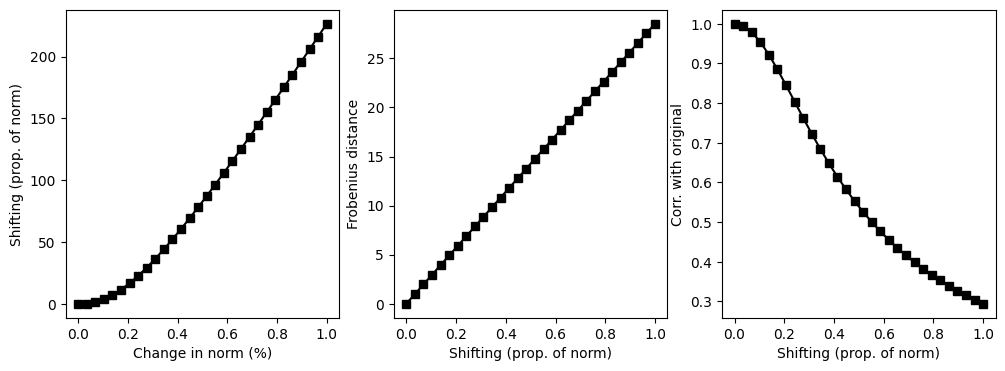

In [57]:
_,axs = plt.subplots(1, 3, figsize = (12, 4))

axs[0].plot(shiftings, norm_changes, 'ks-')
axs[0].set_ylabel('Shifting (prop. of norm)')
axs[0].set_xlabel('Change in norm (%)')

axs[1].plot(shiftings, norm_substracted, 'ks-')
axs[1].set_xlabel('Shifting (prop. of norm)')
axs[1].set_ylabel('Frobenius distance')

axs[2].plot(shiftings, correlations, 'ks-')
axs[2].set_xlabel('Shifting (prop. of norm)')
axs[2].set_ylabel('Corr. with original')
